In [1]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist

import sys
sys.path.append("../..")
from functools import partial

from analyzer.computations.dnnInputs import *
from analyzer.dumperReader.dnnSampleReader import feature_axises, featureNamesByType_withoutPrefix, FeatureType
from analyzer.driver.fileTools import *
from analyzer.driver.computations import *

In [13]:
dumperInput = DumperInputManager([
    "/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/", "/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v9/"
    #    "/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v11/"                          
    ], 
            limitFileCount=None, restrictToAvailableDumperTypes=[DumperType.SuperclsSample]
            )

In [14]:
dumperInput.inputReaders

[SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/ticlNoSuperclsDumper_7.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v9/superclsDumper_7.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v9/superclsDumper_7.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/ticlNoSuperclsDumper_11.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v9/superclsDumper_11.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v9/superclsDumper_11.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/ticlNoSuperclsDumper_10.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v9/superclsDumper_10.root, DumperType.SuperclsSample=

In [15]:
res = runComputations([seed_highestPt, pairs_highestPtSeed], dumperInput, max_workers=10)
highestPtSeed_df = res[0]
pairs_highestPtSeed_df = res[1]

  0%|          | 0/20 [00:00<?, ?it/s]

In [16]:
highestPtSeed_df

seedTracksterIdx  \
eventInternal endcapInternal                     
0             0                            624   
              1                           2068   
1             0                            739   
              1                           2274   
2             0                            611   
...                                        ...   
1997          1                           2886   
1998          0                            753   
              1                           2242   
1999          0                            633   
              1                           2386   

                              seedTracksterBestAssociationScore  \
eventInternal endcapInternal                                      
0             0                                        0.000137   
              1                                        0.000166   
1             0                                        0.001066   
              1                                        0.001769   
2             0                                        0.000483   
...                                                         ...   
1997          1                                        0.000474   
1998          0                                        0.000128   
              1                                        0.001542   
1999          0                                        0.000653   
              1                                        0.000784   

                              feature_multi_en  feature_seedEta  \
eventInternal endcapInternal                                      
0             0                       4.415918        -1.973270   
              1                       1.591291         1.972642   
1             0                       3.461004        -2.566592   
              1                       2.980343         2.566802   
2             0                       1.383488        -2.342914   
...                                        ...              ...   
1997          1                       1.450121         2.117069   
1998          0                       5.840694        -2.258523   
              1                      14.678265         2.258896   
1999          0                       0.962780        -2.198106   
              1                       2.033741         2.197459   

                              feature_seedPhi  feature_seedEn  feature_seedPt  \
eventInternal endcapInternal                                                    
0             0                     -0.374639      217.017410       65.062485   
              1                      2.784783      218.583160       65.621521   
1             0                     -2.431738      349.837708       58.941292   
              1                      0.720294      351.521576       59.224983   
2             0                      1.753514      249.726303       52.364803   
...                                       ...             ...             ...   
1997          1                     -1.672381      311.785370       81.446869   
1998          0                     -2.029902      269.518585       61.250881   
              1                      1.123926      287.309326       65.392746   
1999          0                     -2.267335      197.770218       47.759609   
              1                      0.892963      209.082382       50.490440   

                              endcap  
eventInternal endcapInternal          
0             0                   -1  
              1                    1  
1             0                   -1  
              1                    1  
2             0                   -1  
...                              ...  
1997          1                    1  
1998          0                   -1  
              1                    1  
1999          0                   -1  
              1                    1  

[4000 rows x 8 columns]

In [17]:
pairs_highestPtSeed_df

seedTracksterIdx  candidateTracksterIdx  \
eventInternal pairInternal                                            
0             0                          624                     58   
              1                          624                    580   
              2                          624                    156   
              3                          624                    503   
              4                          624                    160   
...                                      ...                    ...   
1999          200                       2386                   2857   
              201                       2386                   2423   
              202                       2386                   2762   
              203                       2386                   2859   
              204                       2386                   2529   

                            seedTracksterBestAssociationScore  \
eventInternal pairInternal                                      
0             0                                      0.000137   
              1                                      0.000137   
              2                                      0.000137   
              3                                      0.000137   
              4                                      0.000137   
...                                                       ...   
1999          200                                    0.000784   
              201                                    0.000784   
              202                                    0.000784   
              203                                    0.000784   
              204                                    0.000784   

                            candidateTracksterAssociationScoreWithSeed  \
eventInternal pairInternal                                               
0             0                                               1.000000   
              1                                               1.000000   
              2                                               1.000000   
              3                                               1.000000   
              4                                               0.897984   
...                                                                ...   
1999          200                                             1.000000   
              201                                             1.000000   
              202                                             1.000000   
              203                                             1.000000   
              204                                             1.000000   

                            feature_DeltaEtaBaryc  feature_DeltaPhiBaryc  \
eventInternal pairInternal                                                 
0             0                          0.048385               2.029188   
              1                         -0.026008               2.196797   
              2                          0.058261               1.898716   
              3                         -0.089104              -0.259059   
              4                          0.067424               0.022761   
...                                           ...                    ...   
1999          200                        0.045478              -3.260977   
              201                        0.061639              -3.736866   
              202                       -0.077436               0.965604   
              203                       -0.098276               1.492396   
              204                        0.063161               1.822767   

                            feature_multi_en  feature_multi_eta  \
eventInternal pairInternal                                        
0             0                     2.916635          -2.021656   
              1                     9.154588          -1.947262   
              2                     3.

## Pair properties

In [18]:
feature_plotSetting = {"multi_pt" : {"xrange" : (0, 50.)},
                       "explVarRatio" : {"xrange" : (0.8, 1.)}}
feature_noYlog = ["DeltaEtaBaryc", "DeltaPhiBaryc", "explVarRatio"]

def fillHistFeaturePair(feat:str, genMatchingThreshold:float):
    h = hist.Hist(feature_axises[feat], hist.axis.IntCategory([0, 1], name="candidateGenMatching", label="1 : genMatched, 0: nonGenMatched", flow=False), name=feat)
    h.fill(**{feat : pairs_highestPtSeed_df["feature_"+feat], "candidateGenMatching" : pairs_highestPtSeed_df.candidateTracksterAssociationScoreWithSeed < genMatchingThreshold})
    return h

def plotHistFeaturePair(h:hist.Hist):
    feat = h.name
    plt.figure(figsize=(7, 7))
    settings = feature_plotSetting.get(feat, dict())
    h.stack("candidateGenMatching").plot(density=True, yerr=False, label=["Non gen matched", "Gen matched"], color=["tab:blue", "tab:red"], flow="none")
    try:
        plt.xlim(*settings["xrange"])
    except: pass
    if feat not in feature_noYlog:
        plt.yscale("log")
    plt.legend()
    plt.ylabel("Events (a.u.)")

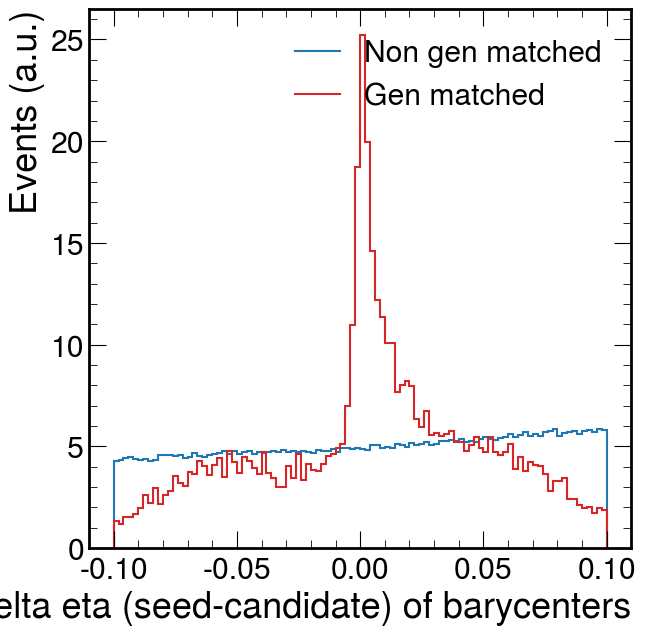

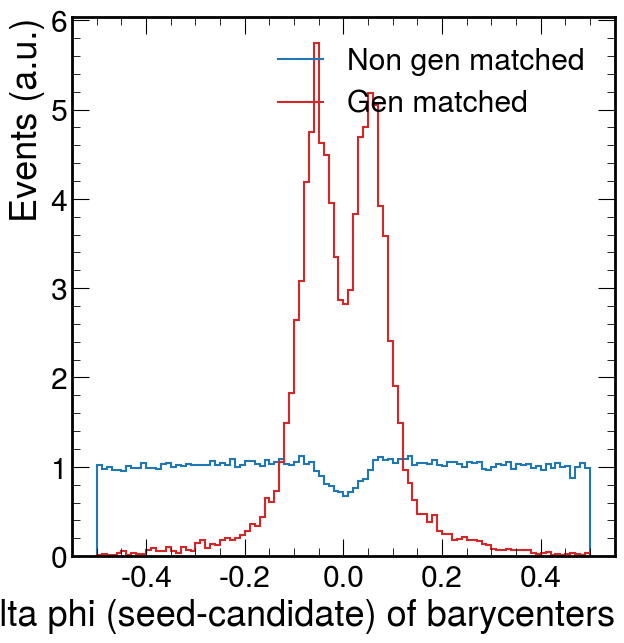

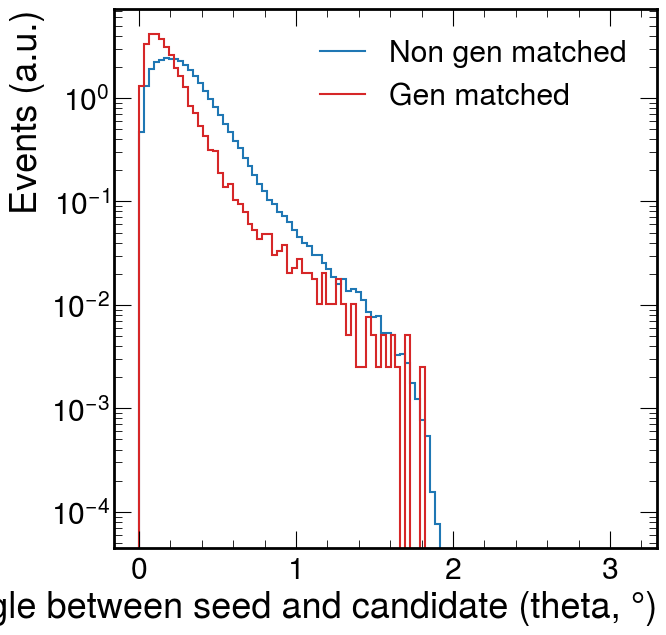

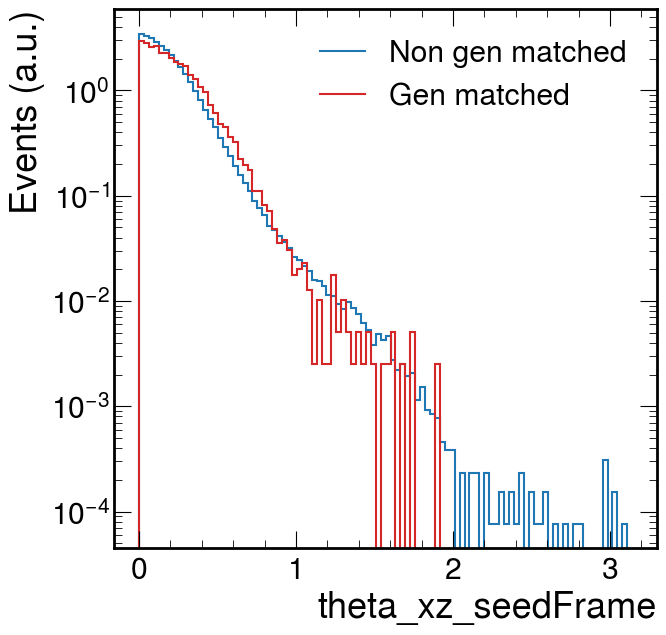

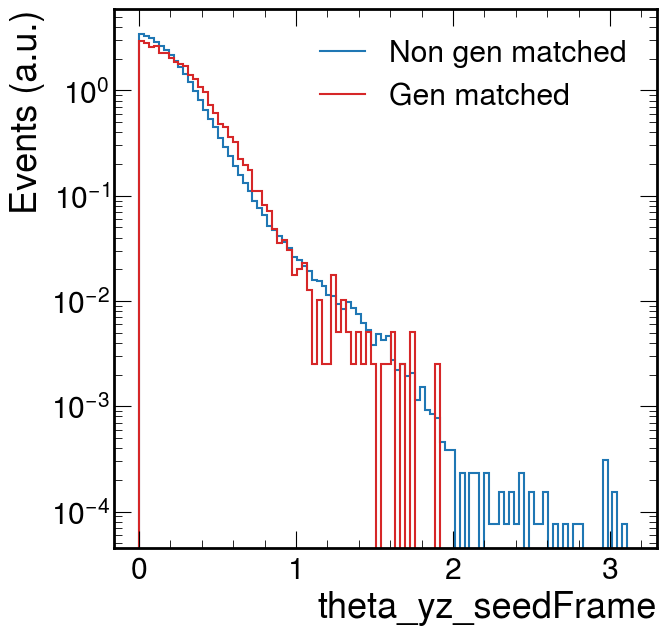

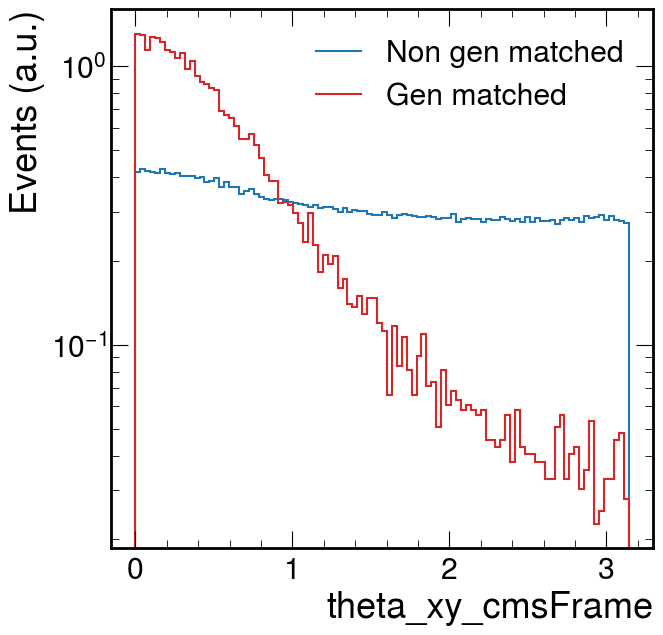

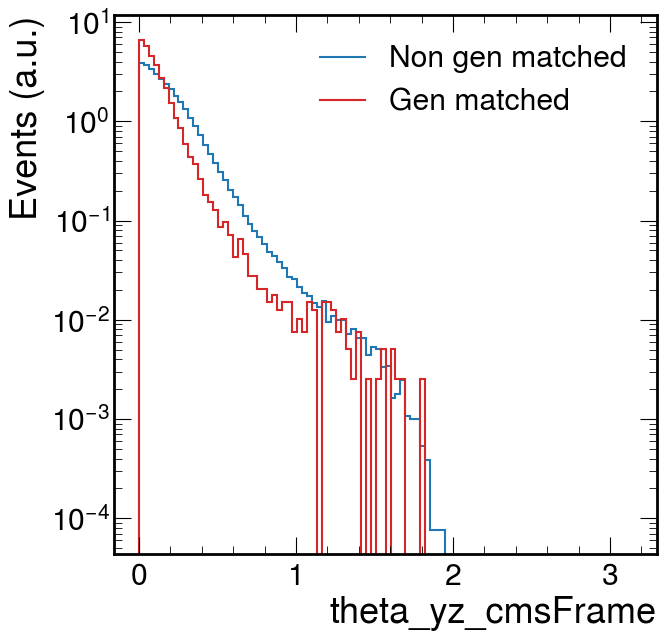

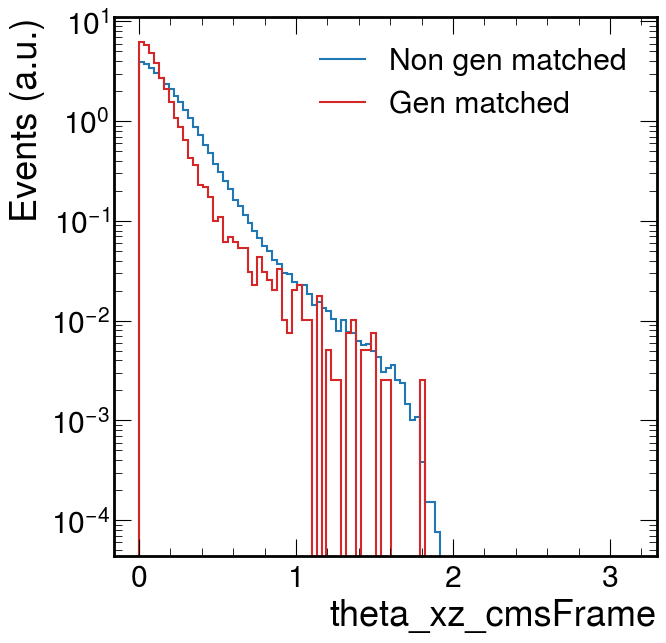

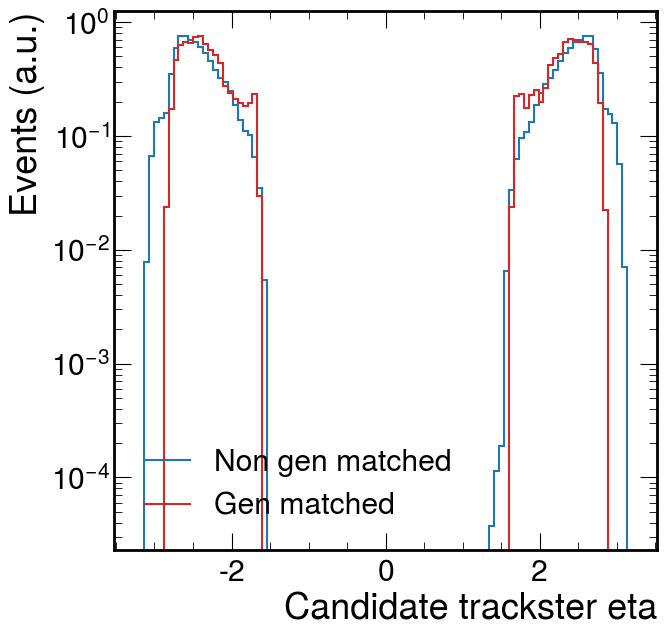

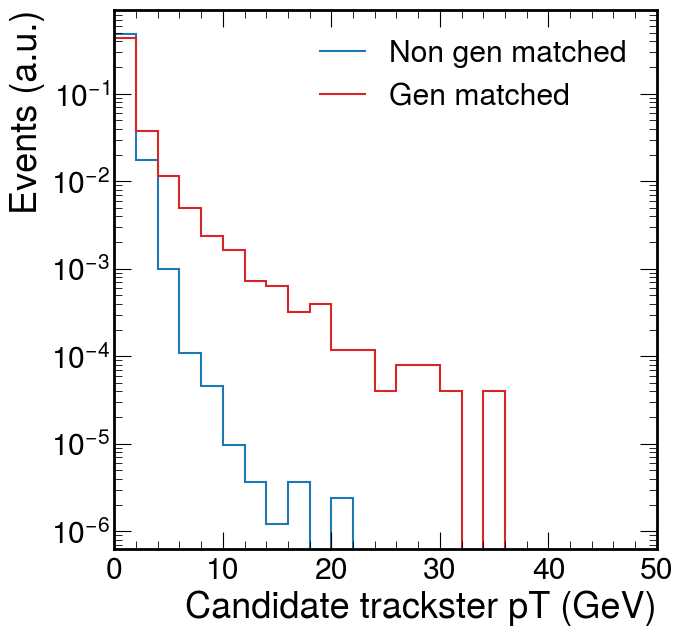

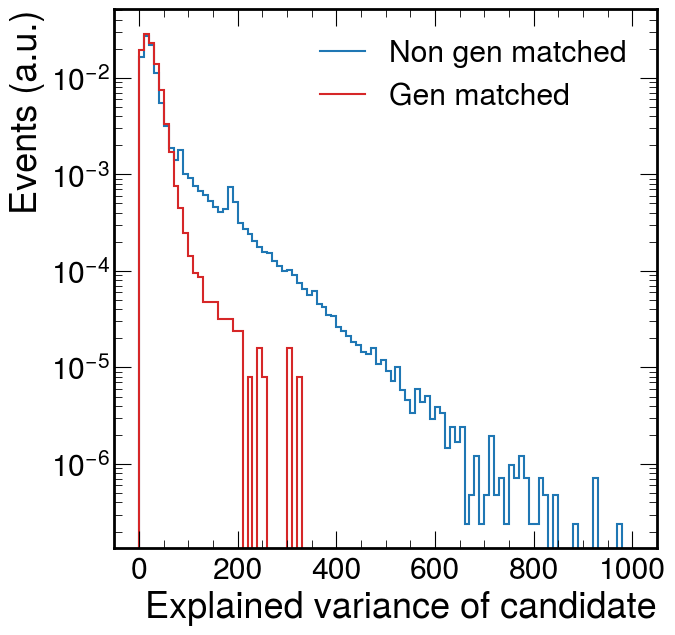

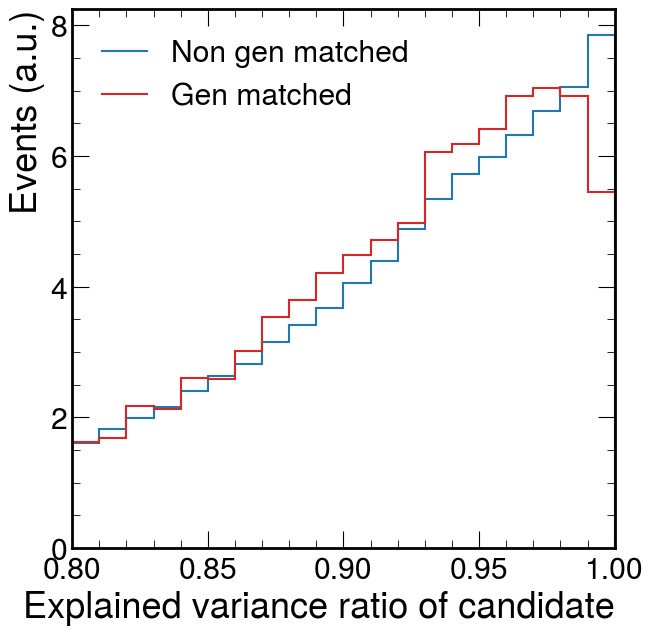

In [19]:
for feat in featureNamesByType_withoutPrefix[FeatureType.Pair]+featureNamesByType_withoutPrefix[FeatureType.Candidate]:
    plotHistFeaturePair(fillHistFeaturePair(feat, 0.5))